In [64]:
# imported modules
import numpy as np
import pandas as pd
import ast

from pandas import Series, DataFrame

In [2]:
# metadata dataframe
md_df = pd.read_csv("movies_metadata.csv", usecols=["id", "budget",
                                                    "production_companies", "production_countries",
                                                    "title", "revenue", "release_date",
                                                   "belongs_to_collection", "genres",
                                                   "original_language", "runtime",
                                                   "vote_average", "vote_count", "popularity"])

md_df = md_df.reindex(columns=["id", "title", "belongs_to_collection", "genres", "budget", "revenue",
                               "original_language", "release_date", "runtime",
                                 "production_companies", "production_countries",
                              "vote_average", "vote_count", "popularity"])

C:\Users\humay\AppData\Local\Temp\ipykernel_25396\1101780405.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  md_df = pd.read_csv("movies_metadata.csv", usecols=["id", "budget",


In [71]:
md_df.columns

Index(['id', 'title', 'belongs_to_collection', 'genres', 'budget', 'revenue',
       'original_language', 'release_date', 'runtime', 'production_companies',
       'production_countries', 'vote_average', 'vote_count', 'popularity'],
      dtype='object')

In [3]:
# credits dataframe
credits_df = pd.read_csv("credits.csv", usecols=["crew", "id"])
credits_df = credits_df.reindex(columns=["id", "crew"])
credits_df["id"] = credits_df["id"].astype(str)

In [6]:
#combined dataframe
combined_df = pd.merge(md_df, credits_df, on="id")
combined_df = combined_df[(combined_df["budget"] != "0") & (combined_df["revenue"] > 0)]
combined_df["budget"] = combined_df["budget"].astype("int64")
combined_df["revenue"] = combined_df["revenue"].astype("int64")
combined_df.dropna(subset = ['runtime'], inplace=True)
combined_df.index = [i for i in range (0, len(combined_df.values))]

combined_df["popularity"] = combined_df["popularity"].astype("float64")

In [8]:
# production companies
data_prod_companies = combined_df["production_companies"]
data_prod_companies_df = pd.DataFrame(data_prod_companies)

prod_comps_ids = data_prod_companies_df['production_companies'].apply(lambda x: [entry['id'] for entry in ast.literal_eval(x)])
prod_comps_names = data_prod_companies_df['production_companies'].apply(lambda x: [entry['name'] for entry in ast.literal_eval(x)])

# genres
data_genres = combined_df["genres"]
data_genres_df = pd.DataFrame(data_genres)
data_genres_df

genres_ids = data_genres_df['genres'].apply(lambda x: [entry['id'] for entry in ast.literal_eval(x)])
genres_names = data_genres_df['genres'].apply(lambda x: [entry['name'] for entry in ast.literal_eval(x)])

# production countries
data_prod_countries = combined_df["production_countries"]
data_prod_countries_df = pd.DataFrame(data_prod_countries)

data_prod_countries_df
prod_countries_id = data_prod_countries_df['production_countries'].apply(lambda x: [entry['iso_3166_1'] for entry in ast.literal_eval(x)])
prod_countries_names = data_prod_countries_df['production_countries'].apply(lambda x: [entry['name'] for entry in ast.literal_eval(x)])

# release_date
data_release_date = combined_df["release_date"].str.split("-")
release_years = []
for each in data_release_date:
    release_years.append(each[0])

In [10]:
# new columns in combined_df

# from:
# production_companies
combined_df["production_companies_id"] = prod_comps_ids
combined_df["production_companies_name"] = prod_comps_names

# genres
combined_df["genres_id"] = genres_ids
combined_df["genres_name"] = genres_names

# production_countries
combined_df["production_countries_id"] = prod_countries_id
combined_df["production_countries_name"] = prod_countries_names

# release_date
combined_df["release_year"] = release_years

In [11]:
combined_df = combined_df.drop(columns=["genres", "production_companies",
                          "production_countries", "release_date"])

combined_df = combined_df.reindex(columns=["id", "belongs_to_collection", "title", "release_year",
                            "genres_id", "genres_name", "budget", "revenue", "original_language",
                            "production_companies_id", "production_companies_name",
                            "production_countries_id", "production_countries_name",
                            "runtime", "vote_average", "vote_count", "popularity", "crew"])

print("DROPPED AND REINDEXED")

DROPPED AND REINDEXED


# Learn below !!!!

In [13]:
combined_df[["budget", "popularity", "release_year", "vote_average", "vote_count", "runtime", "revenue"]].corr()["revenue"]
# use = vote_count, budget
# high correlation > 0.7

budget          0.730223
popularity      0.440736
release_year    0.159641
vote_average    0.167622
vote_count      0.770668
runtime         0.189729
revenue         1.000000
Name: revenue, dtype: float64

# Using to predict Revenue:

- ## vote_count
- ## budget

In [14]:
combined_df.head()

,id,belongs_to_collection,title,release_year,genres_id,genres_name,budget,revenue,original_language,production_companies_id,production_companies_name,production_countries_id,production_countries_name,runtime,vote_average,vote_count,popularity,crew
0,862,"{'id': 10194, 'name': 'Toy Story Collection', ...",Toy Story,1995,"[16, 35, 10751]","[Animation, Comedy, Family]",30000000,373554033,en,[3],[Pixar Animation Studios],[US],[United States of America],81.0,7.7,5415.0,21.946943,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,8844,NaN,Jumanji,1995,"[12, 14, 10751]","[Adventure, Fantasy, Family]",65000000,262797249,en,"[559, 2550, 10201]","[TriStar Pictures, Teitler Film, Interscope Co...",[US],[United States of America],104.0,6.9,2413.0,17.015539,"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,31357,NaN,Waiting to Exhale,1995,"[35, 18, 10749]","[Comedy, Drama, Romance]",16000000,81452156,en,[306],[Twentieth Century Fox Film Corporation],[US],[United States of America],127.0,6.1,34.0,3.859495,"[{'credit_id': '52fe44779251416c91011acb', 'de..."
3,949,NaN,Heat,1995,"[28, 80, 18, 53]","[Action, Crime, Drama, Thriller]",60000000,187436818,en,"[508, 675, 6194]","[Regency Enterprises, Forward Pass, Warner Bros.]",[US],[United States of America],170.0,7.7,1886.0,17.924927,"[{'credit_id': '52fe4292c3a36847f802916d', 'de..."
4,9091,NaN,Sudden Death,1995,"[28, 12, 53]","[Action, Adventure, Thriller]",35000000,64350171,en,"[33, 21437, 23770]","[Universal Pictures, Imperial Entertainment, S...",[US],[United States of America],106.0,5.5,174.0,5.231580,"[{'credit_id': '52fe44dbc3a36847f80ae0f1', 'de..."


In [15]:
import seaborn as sns

C:\Users\humay\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


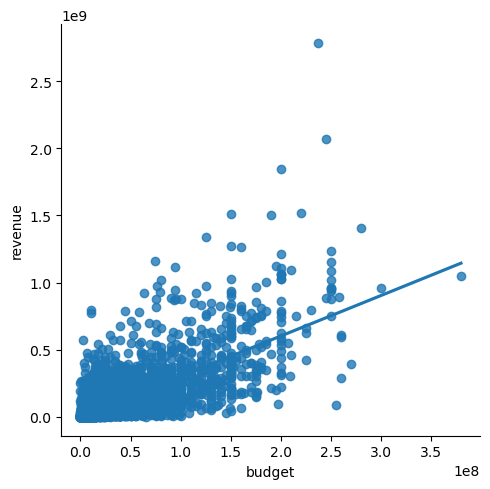

In [16]:
# strong corr()
sns.lmplot(x="budget", y="revenue", data=combined_df, fit_reg=True, ci=None)

C:\Users\humay\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


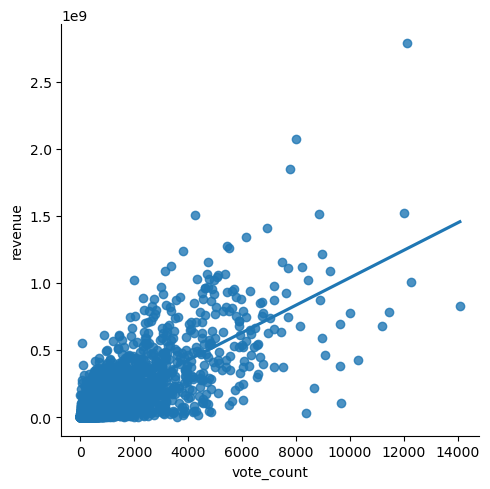

In [17]:
# strong corr()
sns.lmplot(x="vote_count", y="revenue", data=combined_df, fit_reg=True, ci=None)

C:\Users\humay\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


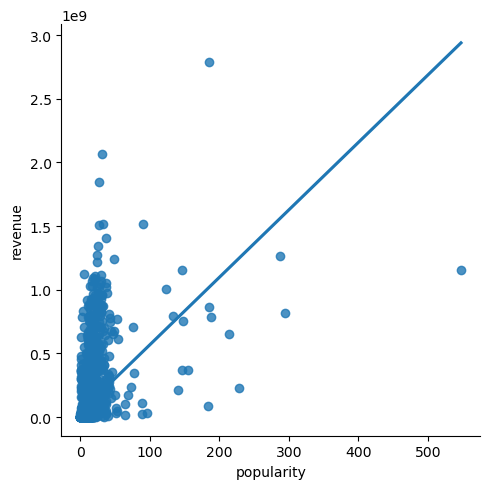

In [18]:
# weak corr() example
sns.lmplot(x="popularity", y="revenue", data=combined_df, fit_reg=True, ci=None)

# historgram below
- most movies (y-axis) have earned between 0 - 500,000,000 (x-axis). (le9 means num x 10^9)

<Axes: ylabel='Frequency'>

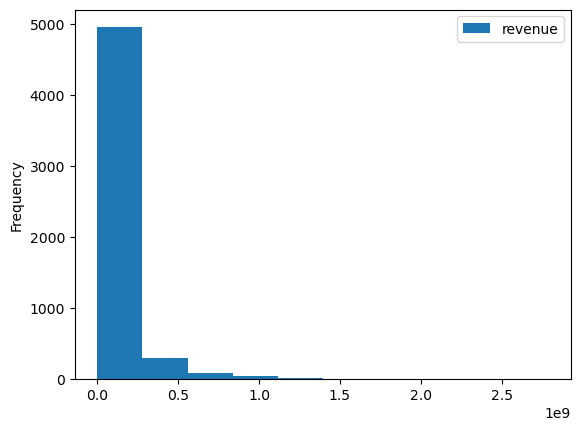

In [19]:
combined_df.plot.hist(y="revenue")

In [21]:
combined_df.columns

Index(['id', 'belongs_to_collection', 'title', 'release_year', 'genres_id',
       'genres_name', 'budget', 'revenue', 'original_language',
       'production_companies_id', 'production_companies_name',
       'production_countries_id', 'production_countries_name', 'runtime',
       'vote_average', 'vote_count', 'popularity', 'crew'],
      dtype='object')

In [23]:
data = combined_df["genres_name"]
    
genre_name_1 = [each[0:1] for each in data]
genre_name_1_list = []
for each in genre_name_1:
    if len(each) == 1:
        genre_name_1_list.append(each.pop())
    else:
        genre_name_1_list.append("Unavailable")
        
#genre_name_1_list

combined_df["genre"] = genre_name_1_list

In [27]:
data = combined_df["production_companies_name"]
    
prod_comp_name = [each[0:1] for each in data]
prod_comp_name1 = []
for each in prod_comp_name:
    if len(each) == 1:
        prod_comp_name1.append(each.pop())
    else:
        prod_comp_name1.append("Unavailable")

#prod_comp_name1
combined_df["production_country"] = prod_country1

In [28]:
data = combined_df["production_countries_name"]
    
prod_country = [each[0:1] for each in data]
prod_country1 = []
for each in prod_country:
    if len(each) == 1:
        prod_country1.append(each.pop())
    else:
        prod_country1.append("Unavailable")
        
#prod_country1
combined_df["production_company"] = prod_comp_name1

# DROP AN REINDEX UNNECESSARY

In [30]:
combined_df = combined_df.drop(columns=["belongs_to_collection", "genres_id", "genres_name",
                                       "production_companies_id", "production_companies_name",
                                       "production_countries_id", "production_countries_name",
                                       "popularity", "crew"])

In [32]:
combined_df = combined_df.reindex(columns=["id", "title", "release_year", "genre",
                             "production_company", "production_country", "original_language",
                             "budget", "runtime", "vote_average", "vote_count", "revenue"])

In [65]:
combined_df.head()

,id,title,release_year,genre,production_company,production_country,original_language,budget,runtime,vote_average,vote_count,revenue
0,862,Toy Story,1995,Animation,Pixar Animation Studios,United States of America,en,30000000,81.0,7.7,5415.0,373554033
1,8844,Jumanji,1995,Adventure,TriStar Pictures,United States of America,en,65000000,104.0,6.9,2413.0,262797249
2,31357,Waiting to Exhale,1995,Comedy,Twentieth Century Fox Film Corporation,United States of America,en,16000000,127.0,6.1,34.0,81452156
3,949,Heat,1995,Action,Regency Enterprises,United States of America,en,60000000,170.0,7.7,1886.0,187436818
4,9091,Sudden Death,1995,Action,Universal Pictures,United States of America,en,35000000,106.0,5.5,174.0,64350171


# Split Train/Test - 80/20

In [34]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(combined_df, test_size=0.2)

In [35]:
train.shape

(4313, 12)

In [36]:
test.shape

(1079, 12)

# Training our Model

In [39]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [40]:
predictors = ["budget", "vote_count"]
target = "revenue"

In [41]:
reg.fit(train[predictors], train["revenue"])

LinearRegression()

In [42]:
predictions = reg.predict(test[predictors])

In [43]:
predictions

array([ 9.48417817e+06,  7.42784549e+07, -7.74611604e+06, ...,
        3.93444600e+08, -5.78739157e+06,  2.22834144e+07])

- negative numbers
- format e7 = 10^7 etc.
- after changing format. still want to round

In [45]:
import numpy as np

def format_predictions(arr):
    return [f'{x:.0f}' for x in arr]

predictions = format_predictions(predictions)
#print(predictions)

- see how many negatives in our solution

In [46]:
predictions = [int(each) for each in predictions]
lol1 = []
for each in predictions:
    if each < 0:
        lol1.append(each)

print(len(predictions), len(lol1))

1079 216


In [47]:
test["predictions"] = predictions

In [66]:
test.head()

,id,title,release_year,genre,production_company,production_country,original_language,budget,runtime,vote_average,vote_count,revenue,predictions
2576,33539,Once Upon a Forest,1993,Animation,Twentieth Century Fox Film Corporation,United Kingdom,en,13000000,71.0,6.2,24.0,6582052,9484178
3222,8836,The X Files: I Want to Believe,2008,Drama,Twentieth Century Fox Film Corporation,Canada,en,30000000,104.0,5.5,534.0,68369434,74278455
1660,248,Pocketful of Miracles,1961,Comedy,Franton Production,United States of America,en,2900000,136.0,7.3,25.0,5000000,7746116
5289,341174,Fifty Shades Darker,2017,Drama,Universal Pictures,United States of America,en,55000000,118.0,6.0,2341.0,378827494,243502450
173,9386,In the Line of Fire,1993,Action,Castle Rock Entertainment,United States of America,en,40000000,128.0,6.8,392.0,176997168,81474357


In [49]:
test.to_csv("test_with_negs_v4.csv")

# PROBLEM:
- Minus values
- Don't know why
- I think i might make them positive:
some of the neg. predicted values are similar to actual value
- some exceptions: e.g) A star is born

## going to change neg. to pos.
## will see using error metrcic how good it is
## error metric: root mean squared error

In [51]:
sample1 = predictions
sample2_abs = [abs(number) for number in sample1]

In [67]:
test["predictions"] = sample2_abs

In [68]:
test.head()

,id,title,release_year,genre,production_company,production_country,original_language,budget,runtime,vote_average,vote_count,revenue,predictions
2576,33539,Once Upon a Forest,1993,Animation,Twentieth Century Fox Film Corporation,United Kingdom,en,13000000,71.0,6.2,24.0,6582052,9484178
3222,8836,The X Files: I Want to Believe,2008,Drama,Twentieth Century Fox Film Corporation,Canada,en,30000000,104.0,5.5,534.0,68369434,74278455
1660,248,Pocketful of Miracles,1961,Comedy,Franton Production,United States of America,en,2900000,136.0,7.3,25.0,5000000,7746116
5289,341174,Fifty Shades Darker,2017,Drama,Universal Pictures,United States of America,en,55000000,118.0,6.0,2341.0,378827494,243502450
173,9386,In the Line of Fire,1993,Action,Castle Rock Entertainment,United States of America,en,40000000,128.0,6.8,392.0,176997168,81474357


In [54]:
test.to_csv("test_no_negs_v5.csv")

# Error Metric
## Root Mean Square Error: RMSE

In [62]:
from sklearn.metrics import mean_squared_error

error1 = mean_squared_error(test["revenue"], test["predictions"], squared=True)
error1

5806830701731963.0

# mean_absolute_percentage_error

In [58]:
from sklearn.metrics import mean_absolute_percentage_error

M_PER = mean_absolute_percentage_error(test["revenue"], test["predictions"])

M_PER

39064.07759662185

# mean absolute error

In [59]:
from sklearn.metrics import mean_absolute_error

M_ABS = mean_absolute_error(test["revenue"], test["predictions"])

M_ABS

42008478.06672845

# RMSE

In [60]:
from sklearn.metrics import mean_squared_error

error2 = mean_squared_error(test["revenue"], test["predictions"], squared=True)

error2

5806830701731963.0

# extra stuff ----


In [70]:
movies_meta_data = pd.read_csv("movies_metadata.csv")
movies_meta_data.columns

C:\Users\humay\AppData\Local\Temp\ipykernel_25396\3995118344.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_meta_data = pd.read_csv("movies_metadata.csv")


Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')